In [203]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [204]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AL_10.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,NaN,NaN,3.55,1.54,72.99,NaN,NaN,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,NaN,1.24,NaN,NaN,NaN,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,NaN,2.02,73.42,NaN,NaN,NaN,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [205]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	21
float64		column 2	5
float64		column 3	16
float64		column 4	20
float64		column 5	15
float64		column 6	46
float64		column 7	30
float64		column 8	31
float64		column 9	0


In [206]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,193.000000,209.000000,198.000000,194.000000,199.000000,168.000000,184.000000,183.000000,214.000000
mean,1.518394,13.411962,2.701364,1.427320,72.668141,0.532143,8.900326,0.152623,0.057009
std,0.003094,0.824760,1.420809,0.484669,0.754761,0.719266,1.296043,0.478808,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516550,12.900000,2.192500,1.190000,72.280000,0.140000,8.227500,0.000000,0.000000
50%,1.517690,13.300000,3.480000,1.355000,72.770000,0.560000,8.600000,0.000000,0.000000
75%,1.519160,13.870000,3.597500,1.617500,73.100000,0.610000,9.192500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,14.680000,3.150000,0.510000


<AxesSubplot:>

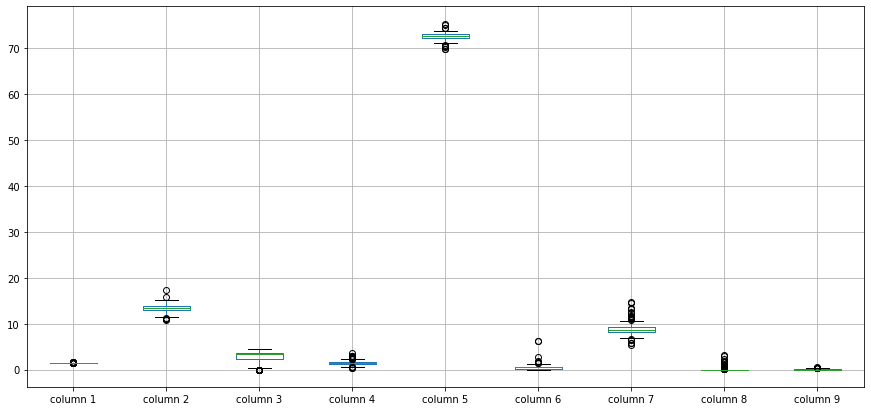

In [207]:
df.boxplot(return_type='axes', figsize=(15,7))

In [208]:
df.mean()

column 1     1.518394
column 2    13.411962
column 3     2.701364
column 4     1.427320
column 5    72.668141
column 6     0.532143
column 7     8.900326
column 8     0.152623
column 9     0.057009
dtype: float64

In [209]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.208064,-0.103128,-0.377956,-0.491859,-0.306129,0.781677,-0.005321,0.173687
column 2,-0.208064,1.000000,-0.258172,0.068780,-0.044207,-0.245800,-0.258154,0.227854,-0.245793
column 3,-0.103128,-0.258172,1.000000,-0.453973,-0.227713,-0.102081,-0.395418,-0.449205,0.103281
column 4,-0.377956,0.068780,-0.453973,1.000000,-0.059379,0.417752,-0.256602,0.488927,-0.051741
column 5,-0.491859,-0.044207,-0.227713,-0.059379,1.000000,-0.230111,-0.125310,-0.161786,-0.066155
column 6,-0.306129,-0.245800,-0.102081,0.417752,-0.230111,1.000000,-0.329281,0.022899,-0.026919
column 7,0.781677,-0.258154,-0.395418,-0.256602,-0.125310,-0.329281,1.000000,-0.106457,0.082294
column 8,-0.005321,0.227854,-0.449205,0.488927,-0.161786,0.022899,-0.106457,1.000000,-0.035936
column 9,0.173687,-0.245793,0.103281,-0.051741,-0.066155,-0.026919,0.082294,-0.035936,1.000000


In [210]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [211]:
imputer = md.Midas(layer_structure = [9,9+27,9+27+27,9+27+27+27,9+27+27+27+27,9+27+27+27+27+27,9+27+27+27+27+27+27,9+27+27+27+27+27,9+27+27+27+27,9+27+27+27,9+27+27,9+27,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 95.24439063439003
Epoch: 1 , loss: 94.82756218543419
Epoch: 2 , loss: 94.77484717735878
Epoch: 3 , loss: 94.92344372089093
Epoch: 4 , loss: 94.73162137545071
Epoch: 5 , loss: 94.78270427997296
Epoch: 6 , loss: 94.78877786489633
Epoch: 7 , loss: 95.12061192439153
Epoch: 8 , loss: 94.72580366868239
Epoch: 9 , loss: 94.76382622352013
Epoch: 10 , loss: 94.66980802095853
Epoch: 11 , loss: 94.68358318622296
Epoch: 12 , loss: 94.72257760854868
Epoch: 13 , loss: 94.75867344782903
Epoch: 14 , loss: 94.7530517578125
Epoch: 15 , loss: 95.45253108097957
Epoch: 16 , loss: 94.63289583646335
Epoch: 17 , loss: 94.67793919489934
Epoch: 18 , loss: 95.5028064434345
Epoch: 19 , loss: 94.59871967022235
Epoch: 20 , loss: 94.68539604773888
Epoch: 21 , loss: 95.18928938645583
Epoch: 22 , loss: 94.71104196401743
Epoch: 23 , loss: 95.08312225341797
Epoch: 24 , loss: 95.09973790095403
Epoch: 25 , loss: 94.77045381986179
Epoch: 26

In [212]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [213]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [214]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [215]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,-0.965591,-10.481937,0.000000,0.0,0.000000,-0.180562,-5.695862,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,-0.890641,0.0,-28.575075,-0.081540,-0.097504,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
210,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
211,0.000000,0.000000,2.591133,0.0,0.000000,0.381697,-0.963801,-1.450233,0.0
212,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [216]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [217]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [218]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(180.93484750312598, 1090.4359815890969)

In [219]:
NRMS=numerator/denominator
NRMS


0.1659289041796373

In [220]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [221]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.521010,13.640000,4.490000,1.10,71.780000,0.060000,8.750000,0.000000,0.0
1,1.517610,13.890000,3.600000,1.36,72.730000,0.480000,7.830000,0.000000,0.0
2,0.550589,3.048063,3.550000,1.54,72.990000,0.209438,2.084138,0.000000,0.0
3,1.517660,13.210000,3.690000,1.29,72.610000,0.570000,8.220000,0.000000,0.0
4,1.517420,13.270000,2.729359,1.24,44.504925,0.468460,7.972496,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.516230,14.140000,0.000000,2.88,72.610000,0.080000,9.180000,1.060000,0.0
210,1.516850,14.920000,0.000000,1.99,73.060000,0.000000,8.400000,1.590000,0.0
211,1.520650,14.360000,2.591133,2.02,73.420000,0.381697,7.476199,0.189767,0.0
212,1.516510,14.380000,0.000000,1.94,73.610000,0.000000,8.480000,1.570000,0.0


In [222]:
imputations[-1].to_excel("Glass_AL_10(imp).xlsx", index=False, header=False)